# Load and render Knowledge Bases
Copyright (c) 2022 Siemens AG Oesterreich
SPDX-License-Identifier: MIT


- How to load a knowledge base from a list of facts with the clorm integration.
- How to render a knowledge based with the clingraph integration

In [ ]:
%cd ..

### Knowledge Base

Import the `OOASPKnowledgeBase` classs

In [2]:
from ooasp.kb import OOASPKnowledgeBase

Create an `OOASPKnowledgeBase` from a logic program

#### Racks example

In [3]:
racks_kb = OOASPKnowledgeBase.from_file("racks_v1","./examples/racks/kb.lp")

Print the object (This uses the asp string representation of the factbase)

In [4]:
print(racks_kb)

%---- OOASPKnowledgeBase (racks_v1) ------
ooasp_assoc(racks_v1,rack_frames,rack,1,1,frame,4,8).
ooasp_assoc(racks_v1,frame_modules,frame,1,1,module,0,5).
ooasp_assoc(racks_v1,element_modules,element,0,1,module,1,4).
ooasp_attribute(racks_v1,frame,frame_position,int).
ooasp_attribute_maxInclusive(racks_v1,frame,frame_position,8).
ooasp_attribute_minInclusive(racks_v1,frame,frame_position,1).
ooasp_class(racks_v1,object).
ooasp_class(racks_v1,rack).
ooasp_class(racks_v1,rackSingle).
ooasp_class(racks_v1,rackDouble).
ooasp_class(racks_v1,frame).
ooasp_class(racks_v1,element).
ooasp_class(racks_v1,elementA).
ooasp_class(racks_v1,elementB).
ooasp_class(racks_v1,elementC).
ooasp_class(racks_v1,elementD).
ooasp_class(racks_v1,module).
ooasp_class(racks_v1,moduleI).
ooasp_class(racks_v1,moduleII).
ooasp_class(racks_v1,moduleIII).
ooasp_class(racks_v1,moduleIV).
ooasp_class(racks_v1,moduleV).
ooasp_kb(racks_v1).
ooasp_subclass(racks_v1,rack,object).
ooasp_subclass(racks_v1,rackSingle,rack).
oo

In [5]:
racks_kb.save_png("examples/racks")

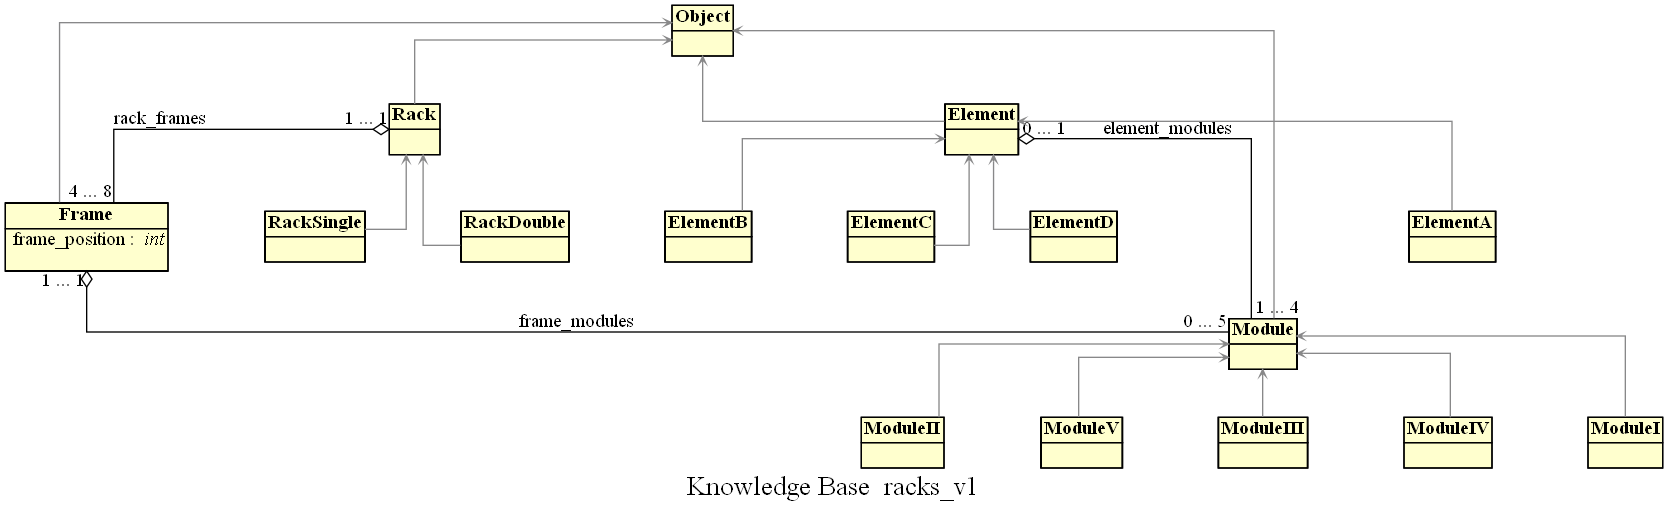

In [6]:
from IPython.display import Image
Image("examples/racks/racks_v1.png")

Query the factbase like a database

In [7]:
clorm_class = racks_kb.UNIFIERS.Class
clorm_subclass = racks_kb.UNIFIERS.SubClass
q = racks_kb.fb.query(clorm_class,clorm_subclass).join(clorm_class.name==clorm_subclass.sub_class)
q = q.where(clorm_subclass.super_class=="rack").select(clorm_class)

In [8]:
print(list(q.all()))

[ooasp_class(racks_v1,rackSingle), ooasp_class(racks_v1,rackDouble)]


In [9]:
print([c.name for c in q.all()])

['rackSingle', 'rackDouble']


#### Metro example

In [10]:
metro_kb = OOASPKnowledgeBase.from_file("metro_v1","./examples/metro/kb.lp")

In [11]:
print(metro_kb)

%---- OOASPKnowledgeBase (metro_v1) ------
ooasp_assoc(metro_v1,wagon_handrail,wagon,1,1,handrail,0,1).
ooasp_assoc(metro_v1,wagon_seats,wagon,1,1,seat,0,80).
ooasp_attribute(metro_v1,wagon,nr_passengers,int).
ooasp_attribute(metro_v1,wagon,nr_seats,int).
ooasp_attribute(metro_v1,wagon,standing_room,int).
ooasp_attribute(metro_v1,seat,seat_type,str).
ooasp_attribute(metro_v1,seat,seat_color,str).
ooasp_attribute(metro_v1,handrail,handrail_type,str).
ooasp_attribute_enum(metro_v1,seat,seat_type,standard).
ooasp_attribute_enum(metro_v1,seat,seat_type,premium).
ooasp_attribute_enum(metro_v1,seat,seat_type,special).
ooasp_attribute_enum(metro_v1,seat,seat_color,blue).
ooasp_attribute_enum(metro_v1,seat,seat_color,red).
ooasp_attribute_enum(metro_v1,seat,seat_color,white).
ooasp_attribute_enum(metro_v1,handrail,handrail_type,standard).
ooasp_attribute_enum(metro_v1,handrail,handrail_type,premium).
ooasp_attribute_maxInclusive(metro_v1,wagon,nr_passengers,200).
ooasp_attribute_maxInclusive(m

In [12]:
metro_kb.save_png("examples/metro")

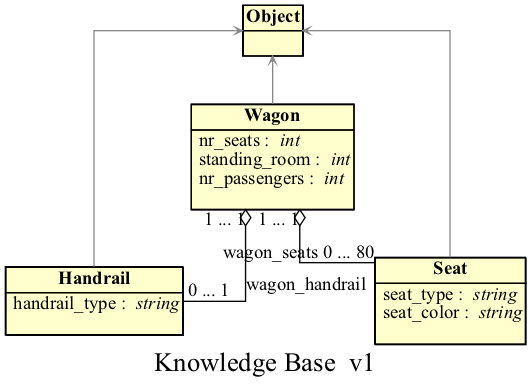

: 

In [13]:
from IPython.display import Image
Image("examples/metro/v1.png")